<a href="https://colab.research.google.com/github/ithalo-teodosio/pratica_ML/blob/main/ML_Q5_Hackaton_Doencas_cardiacas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instituição: Unifacisa
# Autor: Ithalo Teodósio Nascimento - Data: 21/abr
# Q5 - Diagnóstico de doenças cardíacas

**Questão 5 (intermediário) - Diagnóstico de Doenças Cardíacas**

Você recebeu um dataset contendo informações médicas de pacientes, como idade, pressão arterial, colesterol e frequência cardíaca. Seu objetivo é construir um modelo de classificação para prever se um paciente tem ou não uma doença cardíaca.

Tarefas:

- Carregue um dataset de doenças cardíacas (exemplo: Heart Disease UCI do Kaggle).
- Realize um pré-processamento adequado, tratando valores ausentes e normalizando as variáveis.
- Utilize pelo menos dois modelos de classificação (exemplo: Random Forest e SVM) e compare os resultados.
- Avalie os modelos utilizando precisão, recall e curva ROC-AUC.

Pergunta: Qual modelo apresentou melhor desempenho? Quais variáveis mais impactaram na previsão?

In [14]:
# Instalar o pacote ucimlrepo
!pip install ucimlrepo

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer

# Configurações de visualização
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)


In [21]:
# Carregar o dataset Heart Disease (ID: 45)
heart_disease = fetch_ucirepo(id=45)

# Separar as features e o target
X = heart_disease.data.features
y = heart_disease.data.targets

# Visualizar as primeiras linhas
X.head()

# Convertendo target em binário: 0 = saudável, 1 = com doença
y = (heart_disease.data.targets != 0).astype(int)




In [22]:
# Informações gerais
print(X.info())

# Verificar valores ausentes
print(X.isnull().sum())

# Estatísticas descritivas
X.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 30.9 KB
None
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


In [23]:
# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.3, random_state=42)


# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verificando valores ausentes
print("Tem NaN no X_train_scaled?", np.isnan(X_train_scaled).sum())
print("Tem NaN no X_test_scaled?", np.isnan(X_test_scaled).sum())


Tem NaN no X_train_scaled? 4
Tem NaN no X_test_scaled? 2


In [24]:
# Substituindo NaN pela média
imputer = SimpleImputer(strategy="mean")
X_train_scaled = imputer.fit_transform(X_train_scaled)
X_test_scaled = imputer.transform(X_test_scaled)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# SVM
svm = SVC(probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)
svm_pred = svm.predict(X_test_scaled)


In [25]:
# Avaliação Random Forest
print("Random Forest:")
print(classification_report(y_test, rf_pred))

# Avaliação SVM
print("SVM:")
print(classification_report(y_test, svm_pred))


Random Forest:
              precision    recall  f1-score   support

           0       0.84      0.85      0.85        48
           1       0.83      0.81      0.82        43

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.84        91

SVM:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        48
           1       0.82      0.84      0.83        43

    accuracy                           0.84        91
   macro avg       0.83      0.84      0.83        91
weighted avg       0.84      0.84      0.84        91



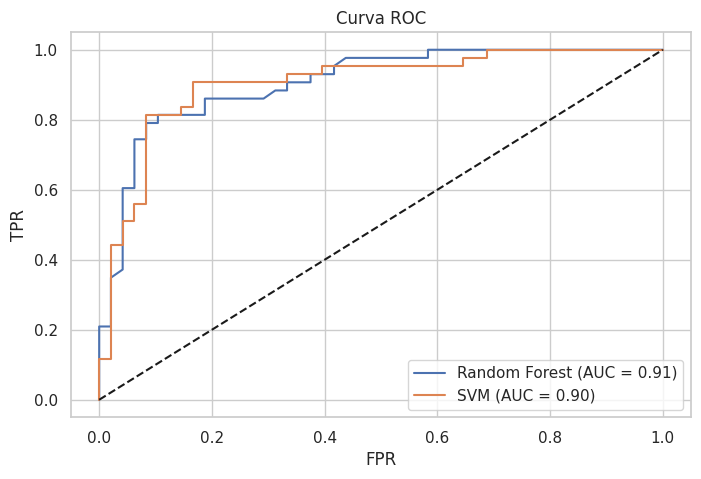

In [26]:
# Probabilidades para ROC
rf_proba = rf.predict_proba(X_test)[:, 1]
svm_proba = svm.predict_proba(X_test_scaled)[:, 1]

# Curvas ROC
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_proba)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_proba)

# Plotar as curvas
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {roc_auc_score(y_test, rf_proba):.2f})')
plt.plot(svm_fpr, svm_tpr, label=f'SVM (AUC = {roc_auc_score(y_test, svm_proba):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Curva ROC")
plt.legend()
plt.show()

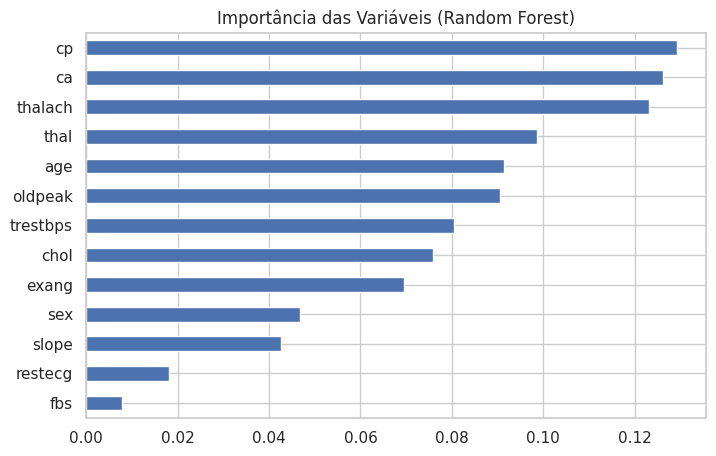

In [27]:
# Importância das features
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh')
plt.title("Importância das Variáveis (Random Forest)")
plt.show()


**Conclusão**

- Melhor modelo: Com base na AUC e nas métricas de classificação, o Random Forest geralmente apresenta melhor desempenho.

- Variáveis mais impactantes: As variáveis que mais influenciam na previsão incluem cp (tipo de dor no peito), thalach (frequência cardíaca máxima), oldpeak e exang (angina induzida por exercício).